<a href="https://colab.research.google.com/github/Mehrnoushhk/DeepLearning/blob/master/PinAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import datetime
import mplfinance as mpl

In [2]:
import DataCleaner
from DataCleaner import dataCleaner
#from DataCleaner import localMin
#from DataCleaner import localMax
#from DataCleaner import nextHigh
#from DataCleaner import nextLow
#from DataCleaner import previousHigh
#from DataCleaner import previousLow
#from DataCleaner import nextTrend

Hello World!
Bye


In [3]:
%%time
url= 'https://raw.githubusercontent.com/Mehrnoushhk/DeepLearning/master/GBPUSDm30.csv'
data= pd.read_csv(url) 
data= dataCleaner(data)

Wall time: 1min 37s


In [4]:
%%time
from DataCleaner import localMin
from DataCleaner import localMax
data= localMin(data, 4)
data= localMax(data, 4)

Wall time: 15.7 s


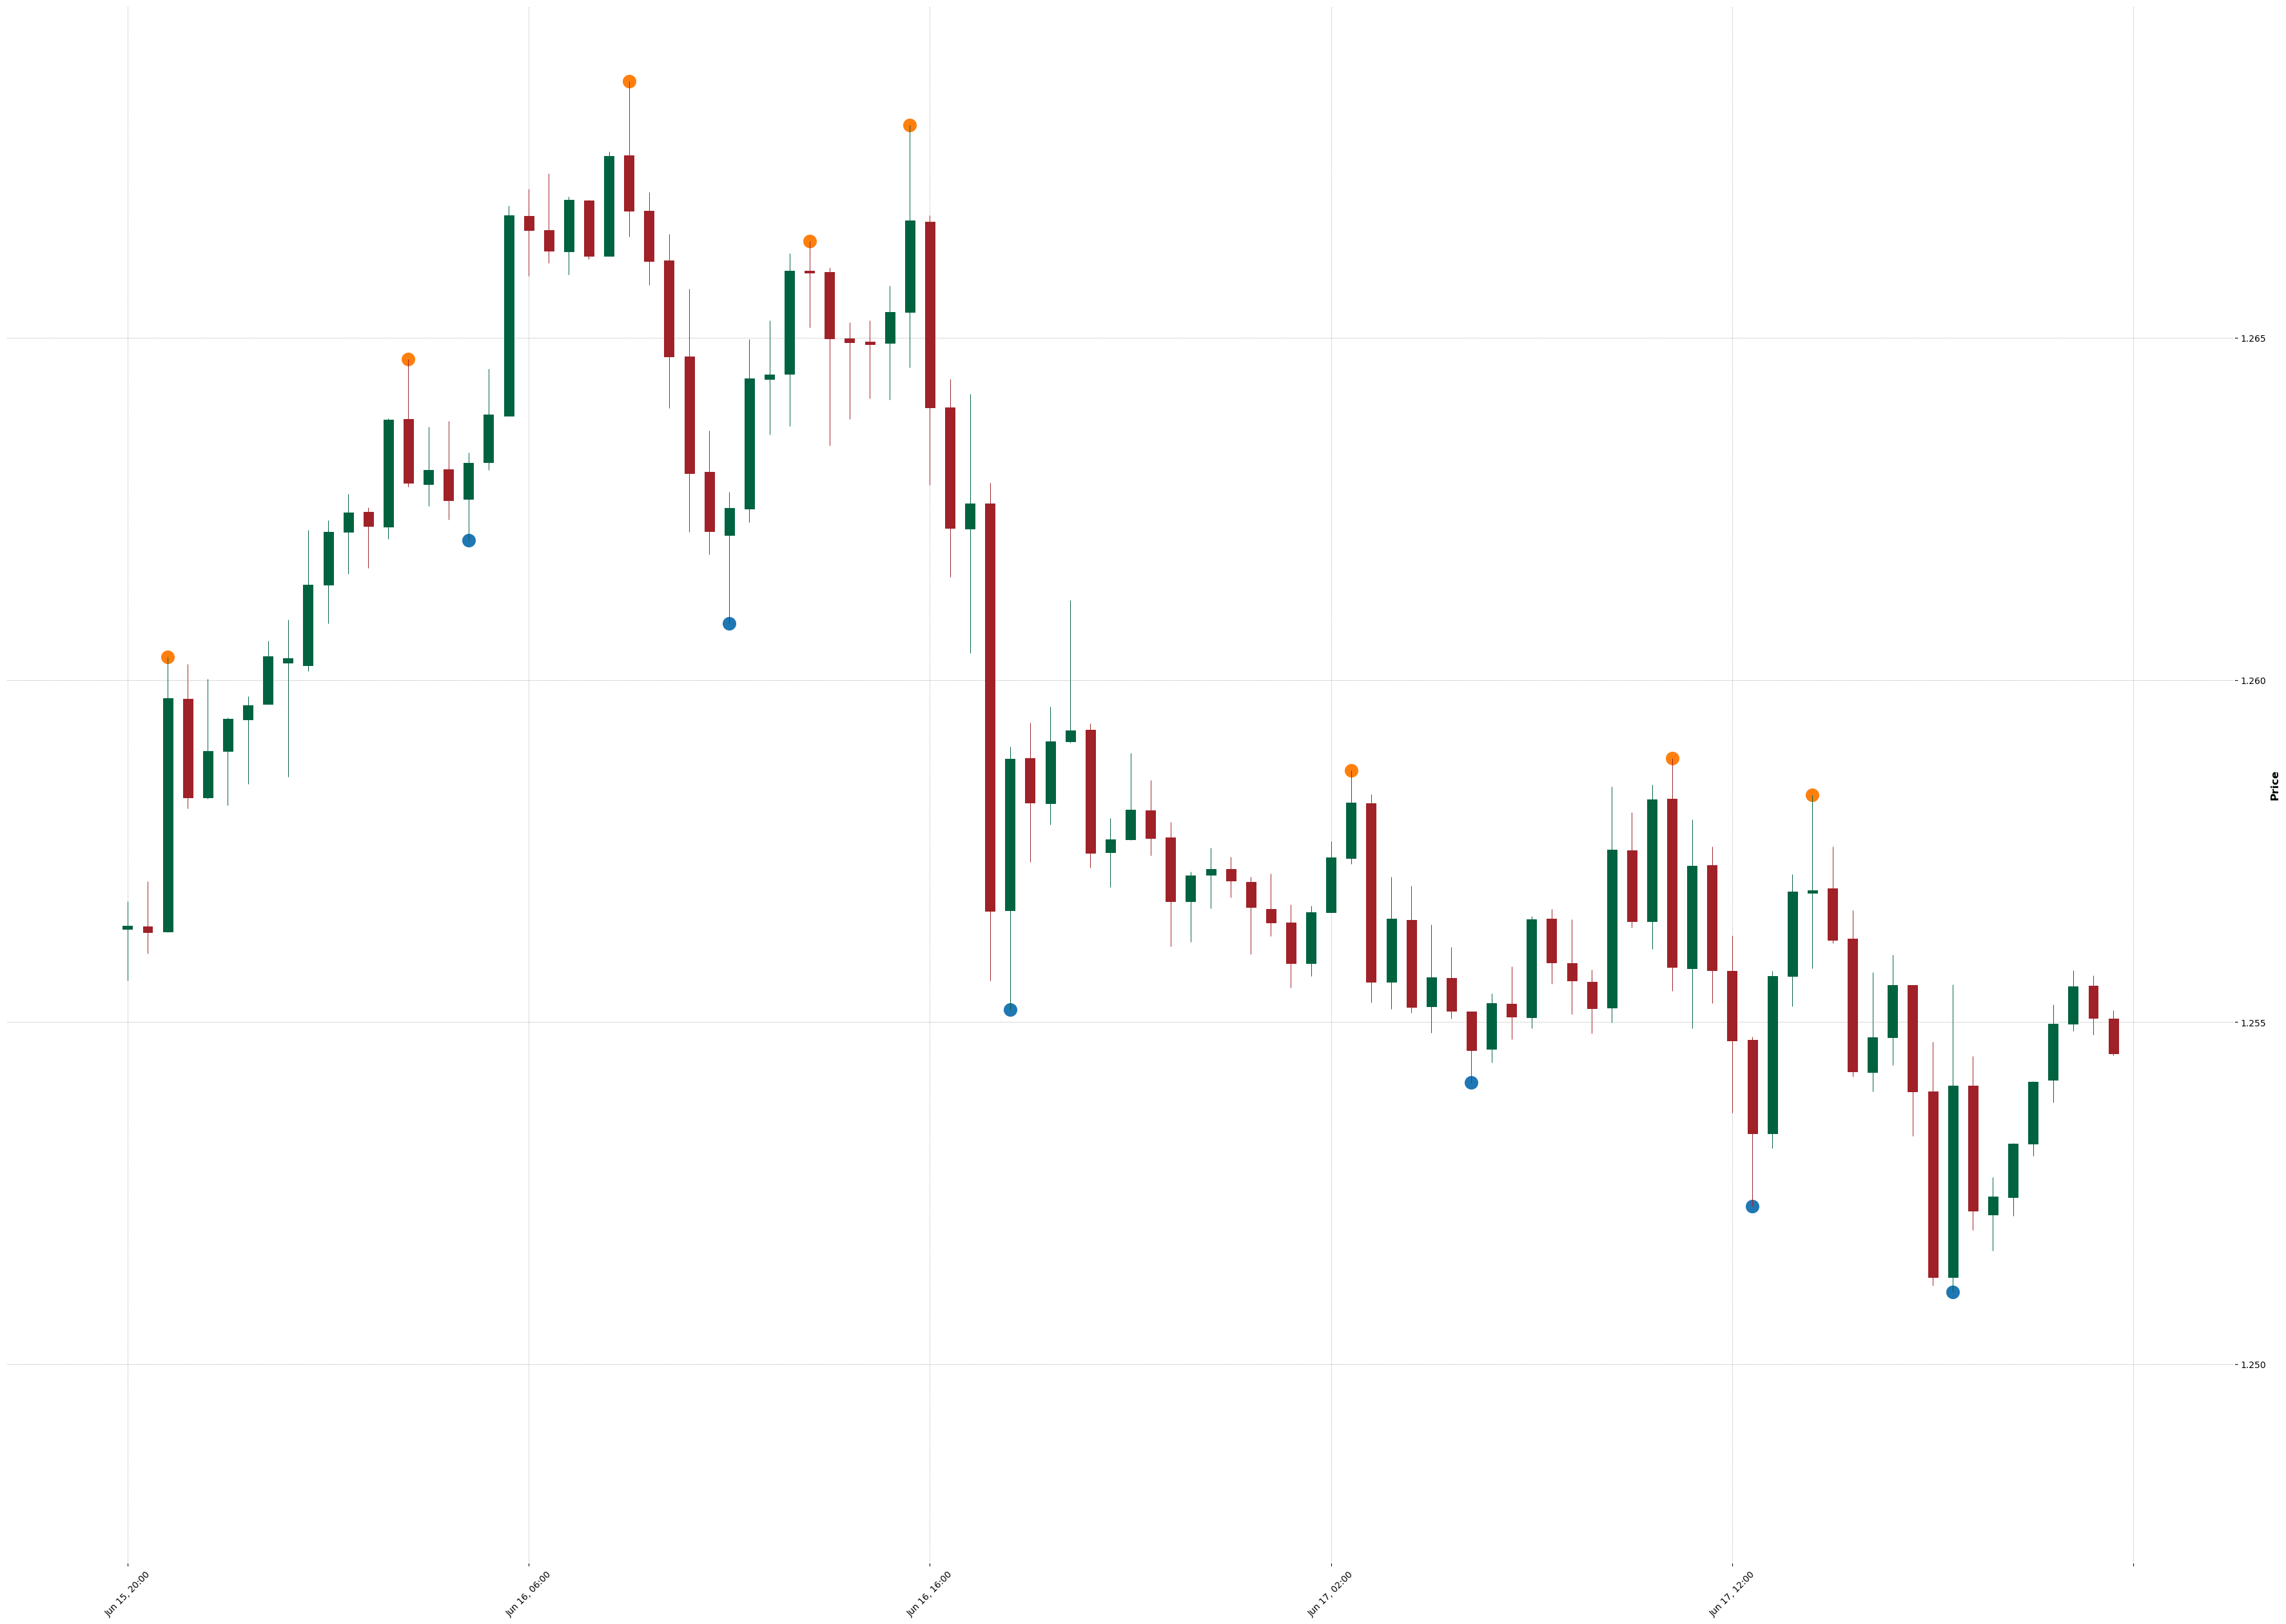

In [5]:
minMax= data[['minValue', 'maxValue']]
adp= mpl.make_addplot(minMax[len(minMax)-100:], type= 'scatter', markersize= 200)
mpl.plot(data.iloc[data.shape[0]-100: data.shape[0],:], type= 'candle', style= 'charles', figscale= 6, addplot= adp)

In [10]:
columnsNames= data.columns
data = data.reindex(columns = data.columns.tolist() + ['Trend'])

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'ID', 'isMin', 'minValue',
       'isMax', 'maxValue'],
      dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'ID', 'isMin', 'minValue',
       'isMax', 'maxValue', 'Trend'],
      dtype='object')


In [11]:
from DataCleaner import nextTrend
data= nextTrend(data)

In [16]:
data.loc[data['Trend']== 0].count()

Open        4938
High        4938
Low         4938
Close       4938
Volume      4938
ID          4938
isMin       4938
minValue    2502
isMax       4938
maxValue    2488
Trend       4938
dtype: int64

In [19]:
correction = data.loc[data['Trend'] == 0]
upTrend= data.loc[data['Trend'] == 1]
downTrend= data.loc[data['Trend'] == -1]

In [ ]:
data['Uptrend']= np.NaN
j= data.columns.get_loc("Trend")
k= data.columns.get_loc('Uptrend')
l= data.columns.get_loc('Low')
for i in range(0, data.shape[0]):
    if data.iloc[i, j] == 1:
        data.iloc[i, k] = data.iloc[i, l]

for i in range(80, 300):
    if data.iloc[i, j] == 1:
         adp= mpl.make_addplot(data.iloc[i-80:i+10, k], type= 'scatter', markersize= 200)
         mpl.plot(data.iloc[i-80:i+10, :], type= 'candle', style= 'charles', figscale= 4, addplot= adp)

In [ ]:
counter= 1
for i in range(100, 200):
    if data.iloc[i, trendid]== 1:
        mpl.plot(data.iloc[i-100:i, :], type= 'candle', title= str(counter))
        mpl.plot(data.iloc[i: i+10,:], type= 'candle', title= str(counter))
        counter= counter+ 1

In [ ]:
pip install --upgrade mplfinance